In [2]:
import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as gnb

from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, RocCurveDisplay, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV
import pickle
import numpy as np
import pandas as pd
import sample_data as sd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm.notebook import tqdm
from sklearn.inspection import permutation_importance

from IPython.display import display,HTML
df = pd.read_csv("/Users/NathanSwan 1/Downloads/heart_cleaned_final2.csv", nrows=50000)

df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,SleepCategory_Very Short,SleepCategory_Short,SleepCategory_Normal,SleepCategory_Long
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
1,0,20.34,0,0,1,0.0,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [3]:
import pickle

# adjust paths/filenames as needed
with open('/Users/NathanSwan 1/Downloads/331 Project/X_train.p', 'rb') as f:
    X_train = pickle.load(f)

with open('/Users/NathanSwan 1/Downloads/331 Project/X_test.p', 'rb') as f:
    X_test = pickle.load(f)

with open('/Users/NathanSwan 1/Downloads/331 Project/y_train.p', 'rb') as f:
    y_train = pickle.load(f)

with open('/Users/NathanSwan 1/Downloads/331 Project/y_test.p', 'rb') as f:
    y_test = pickle.load(f)

# quick check
print(X_train.shape, X_test.shape, len(y_train), len(y_test))

(35000, 21) (15000, 21) 35000 15000


Tree Augemented Network Bayesian Network

In [4]:


bnc = skbn.BNClassifier(learningMethod = 'TAN') ## Tree-Augmented Network.

bnc.fit(X_train, y_train)

y_train_hat = bnc.predict(X_train)
y_test_hat = bnc.predict(X_test)

bnc.score(X_train, y_train), bnc.score(X_test, y_test)


/opt/anaconda3/envs/MISY331__base/lib/python3.13/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/envs/MISY331__base/lib/python3.13/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/envs/MISY331__base/lib/python3.13/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


(0.7485142857142857, 0.7406)

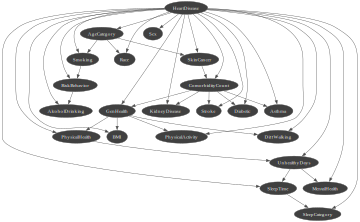

In [5]:
gnb.showBN(bnc.bn)

In [8]:
with open('bayesian_network_model.pkl', 'wb') as file:
    pickle.dump(bnc.bn, file)